<a href="https://colab.research.google.com/github/tiwariadarsh07/Machine-Learning-Projects/blob/main/Weather%20Prediction(DT%2CRF%20-%20HPT%20%26%20Regularization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
import matplotlib
import seaborn as sns
%matplotlib inline 


In [ ]:
df = pd.read_csv('weatherAUS.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.dropna(subset = ['RainTomorrow'], inplace = True)

## Preparing Data for Training

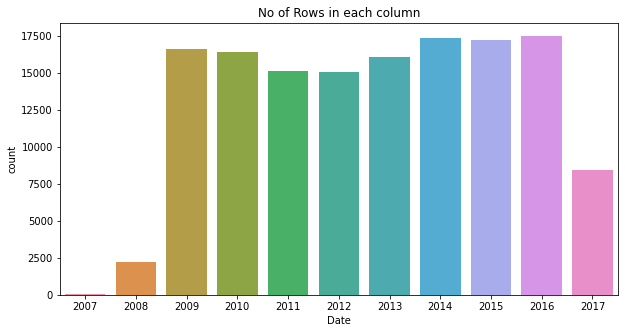

In [ ]:
plt.figure(figsize = (10,5))
plt.title("No of Rows in each column")
sns.countplot(x = pd.to_datetime(df.Date).dt.year)
plt.show()

In [ ]:
df['year'] = pd.to_datetime(df.Date).dt.year
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008


In [ ]:
train_df = df[df.year<2015]
validation_df = df[df.year==2015]
test_df = df[df.year>2015]
print("Training data shape", train_df.shape)
print("Validation data Shape:" , validation_df.shape)
print("Test data shape: ", test_df.shape)

Training data shape (98988, 24)
Validation data Shape: (17231, 24)
Test data shape:  (25974, 24)


In [ ]:
train_df.drop(['year'],axis  = 1,  inplace= True )
validation_df.drop(['year'],axis  = 1,  inplace= True )
test_df.drop(['year'], axis = 1,  inplace= True )

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
input_col = list(df.columns)[1:-2]
input_col

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [ ]:
target_col = "RainTomorrow"

In [ ]:
train_features = train_df[input_col].copy()
train_label = train_df[target_col].copy()

In [ ]:
train_features.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [ ]:
validation_features = validation_df[input_col].copy()
validation_label = validation_df[target_col].copy()

In [ ]:
test_features = test_df[input_col].copy()
test_label = test_df[target_col].copy()

In [ ]:
test_features.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

## Identifying the numerical and Categorical Columns and manipulating the dataset

In [ ]:
numerical_cols = train_features.select_dtypes(include = np.number).columns.to_list()
numerical_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
categorical_cols = train_features.select_dtypes( include = 'object').columns.to_list()
categorical_cols


['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

## Imputing the numverical Values

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = "mean")

In [ ]:
imputer.fit(train_features[numerical_cols])

SimpleImputer()

In [ ]:
train_features[numerical_cols].isnull().sum().sort_values(ascending = False)

Sunshine         40696
Evaporation      37110
Cloud3pm         36766
Cloud9am         35764
Pressure9am       9345
Pressure3pm       9309
WindGustSpeed     6902
Humidity9am       1265
Humidity3pm       1186
WindSpeed3pm      1140
WindSpeed9am      1133
Rainfall          1000
Temp9am            783
Temp3pm            663
MinTemp            434
MaxTemp            198
dtype: int64

In [ ]:
train_features[numerical_cols] = imputer.transform(train_features[numerical_cols])
validation_features[numerical_cols] = imputer.transform(validation_features[numerical_cols])
test_features[numerical_cols] = imputer.transform(test_features[numerical_cols])

In [ ]:
train_features[numerical_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## Scaling the numerical features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(df[numerical_cols])

MinMaxScaler()

In [ ]:
train_features[numerical_cols] = scaler.transform(train_features[numerical_cols])
validation_features[numerical_cols] = scaler.transform(validation_features[numerical_cols])
test_features[numerical_cols] = scaler.transform(test_features[numerical_cols])

In [ ]:
train_features[numerical_cols].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.516509,0.523629,0.001617,0.036461,0.524285,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.490495,0.508439,0.522073
1,0.375000,0.565217,0.000000,0.036461,0.524285,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.478672,0.490495,0.514768,0.570058
2,0.504717,0.576560,0.000000,0.036461,0.524285,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.478672,0.222222,0.594937,0.548944
3,0.417453,0.620038,0.000000,0.036461,0.524285,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.478672,0.490495,0.533755,0.612284
4,0.613208,0.701323,0.002695,0.036461,0.524285,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704


In [ ]:
train_features.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.0,0.013233,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0304,0.0,0.0,0.027426,0.005758
max,1.0,1.000000,1.0,0.568276,0.986207,1.0,0.669231,1.0,1.0,1.0,1.0,1.0000,1.0,1.0,1.000000,0.988484


## Encoding the categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
encoder = OneHotEncoder(sparse = False, handle_unknown= 'ignore')

In [ ]:
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

## Filling null values of cateforical cols & transforming

In [ ]:
train_features[categorical_cols] = train_features[categorical_cols].fillna("Unknown")
validation_features[categorical_cols] =  validation_features[categorical_cols] .fillna("Unknown")
test_features[categorical_cols] =  test_features[categorical_cols].fillna("Unknown")

In [ ]:
train_features[categorical_cols].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [ ]:
train_features[encoded_cols] = encoder.transform(train_features[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [ ]:
train_features[encoded_cols].shape

(98988, 103)

In [ ]:
validation_features[encoded_cols] = encoder.transform(validation_features[categorical_cols])
test_features[encoded_cols] = encoder.transform(test_features[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [ ]:
x_train = train_features[ numerical_cols + encoded_cols]
x_validation = validation_features[numerical_cols + encoded_cols]
x_test = test_features[numerical_cols + encoded_cols]

In [ ]:
print(' Train: ',x_train.shape)
print(' Validation: ',x_validation.shape)
print(' Test: ',x_test.shape)

 Train:  (98988, 119)
 Validation:  (17231, 119)
 Test:  (25974, 119)


In [ ]:
x_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,0.681604,0.801512,0.000000,0.036461,0.524285,0.372093,0.000000,0.080460,0.46,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,0.693396,0.725898,0.001078,0.036461,0.524285,0.341085,0.069231,0.195402,0.54,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,0.634434,0.527410,0.005930,0.036461,0.524285,0.325581,0.084615,0.448276,0.62,0.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,0.608491,0.538752,0.042049,0.036461,0.524285,0.255814,0.069231,0.195402,0.74,0.65,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2502,0.566038,0.523629,0.018329,0.036461,0.524285,0.193798,0.046154,0.103448,0.92,0.63,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Training Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state = 42)

In [ ]:
%%time 
model.fit(x_train, train_label)

CPU times: user 3.06 s, sys: 8.81 ms, total: 3.07 s
Wall time: 3.09 s


DecisionTreeClassifier(random_state=42)

## Evaluating the Model

In [ ]:
train_predictions = model.predict(x_train)

In [ ]:
train_predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
pd.value_counts(train_predictions)

No     76707
Yes    22281
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy = accuracy_score(train_label, train_predictions)

In [ ]:
accuracy

0.9999797955307714

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
train_probability = model.predict_proba(x_train)
train_probability

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

;On Decision Tree model.score() will automatically predict and calcualte the accuracy score of given data.

In [ ]:
validation_score = model.score(x_validation, validation_label)
validation_score

0.7913644013696245

In [ ]:
validation_prediction = model.predict(x_validation)
acc_score = accuracy_score(validation_label, validation_prediction)
acc_score

0.7913644013696245

In [ ]:
test_prediction = model.predict(x_test)
test_acc_score = accuracy_score(test_label, test_prediction)
test_acc_score

0.774081774081774

## Plottng Decision Tree

In [ ]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.125, 0.375, 'Sunshine <= 0.524\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.513\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

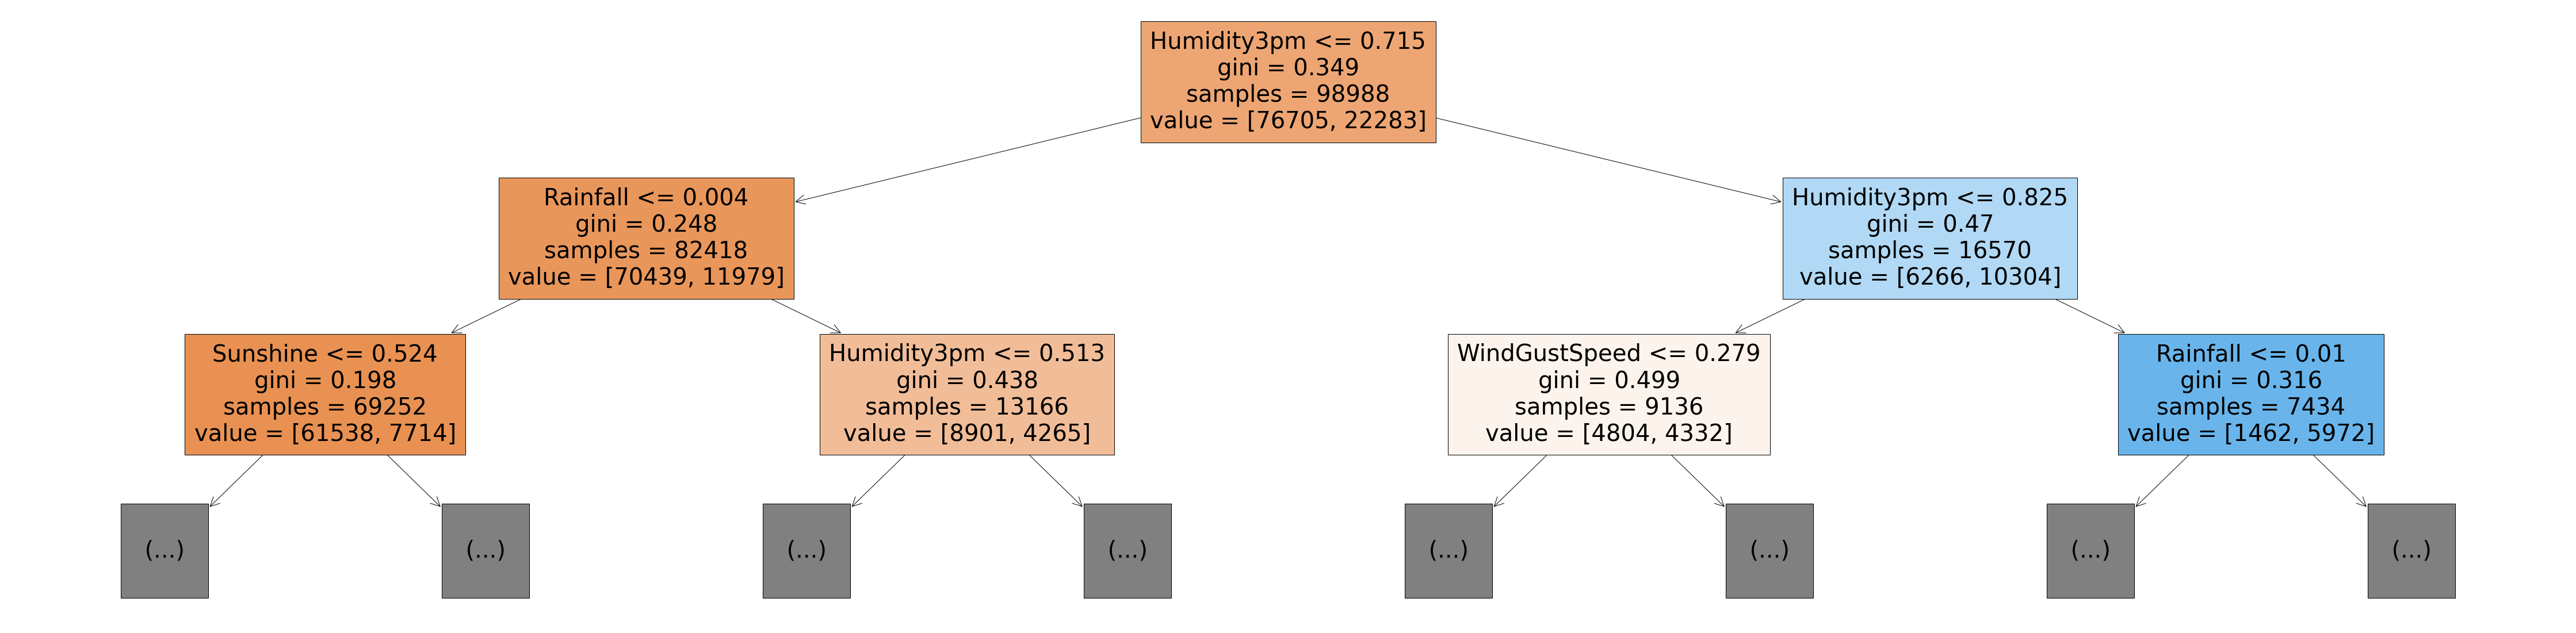

In [ ]:
plt.figure(figsize =(80,20))
plot_tree(model, feature_names = x_train.columns, max_depth = 2, filled = True)

In [ ]:
model.tree_.max_depth

48

In [ ]:
tree_text = export_text(model, max_depth= 5, feature_names=list(x_train.columns))
print(tree_text)

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- truncated branch of depth 33
|   |   |   |   |--- WindGustSpeed >  0.36
|   |   |   |   |   |--- Humidity3pm <= 0.45
|   |   |   |   |   |   |--- truncated branch of depth 20
|   |   |   |   |   |--- Humidity3pm >  0.45
|   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |--- Pressure3pm >  0.58
|   |   |   |   |--- Pressure3pm <= 0.70
|   |   |   |   |   |--- Sunshine <= 0.32
|   |   |   |   |   |   |--- truncated branch of depth 30
|   |   |   |   |   |--- Sunshine >  0.32
|   |   |   |   |   |   |--- truncated branch of depth 25
|   |   |   |   |--- Pressure3pm >  0.70
|   |   |   |   |   |--- Location_CoffsHarbour <= 0.50
|   |   | 

In [ ]:
model.feature_importances_

array([3.66484809e-02, 3.21703672e-02, 5.95785129e-02, 2.40266414e-02,
       4.96837128e-02, 5.59199801e-02, 2.80581060e-02, 3.00470083e-02,
       3.94923736e-02, 2.61425448e-01, 3.48157615e-02, 6.18447149e-02,
       1.35078959e-02, 1.72450711e-02, 3.38565254e-02, 3.13995409e-02,
       2.68179722e-03, 2.20572021e-03, 1.53350265e-03, 5.74068809e-04,
       1.63292643e-03, 1.04897481e-03, 6.53976203e-04, 1.85296069e-03,
       1.07902856e-03, 1.65914612e-03, 9.41244299e-04, 2.21594776e-03,
       1.73650230e-03, 2.16963543e-04, 1.13889446e-03, 1.32288443e-03,
       4.08682795e-04, 9.40816418e-04, 1.76963134e-03, 9.49712814e-04,
       9.00401838e-04, 7.91075503e-04, 1.85453431e-03, 2.22269846e-03,
       5.59445703e-04, 5.49046301e-04, 1.32911387e-03, 1.62706484e-03,
       1.57495034e-03, 1.35350604e-03, 7.35583213e-04, 1.46357271e-03,
       1.29323662e-03, 2.17969580e-03, 8.20627980e-04, 1.69589206e-03,
       1.01156090e-03, 1.26205980e-03, 1.14603881e-03, 6.10324927e-04,
      

In [ ]:
len(model.feature_importances_)

119

In [ ]:
x_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=119)

In [ ]:
importance_df = pd.DataFrame({
    'Feature' : x_train.columns,
    "Importance": model.feature_importances_
}).sort_values('Importance',ascending = False)
importance_df.head(10)

,Feature,Importance
9,Humidity3pm,0.261425
11,Pressure3pm,0.061845
2,Rainfall,0.059579
5,WindGustSpeed,0.055920
4,Sunshine,0.049684
8,Humidity9am,0.039492
0,MinTemp,0.036648
10,Pressure9am,0.034816
14,Temp9am,0.033857
1,MaxTemp,0.032170


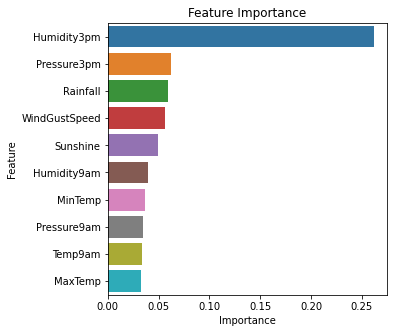

In [ ]:
plt.figure(figsize= (5,5))
plt.title("Feature Importance")
sns.barplot(data = importance_df.head(10), x ='Importance',y ="Feature")

## Hyperparameter Tuning, Overfitting and regularization

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.fit(x_train, train_label)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.score(x_train, train_label)

0.8291308037337859

In [ ]:
model.score(x_validation, validation_label)

0.8334397307178921

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]\nclass = No'),
 Text(0.125, 0.375, 'Sunshine <= 0.524\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.513\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]\ncla

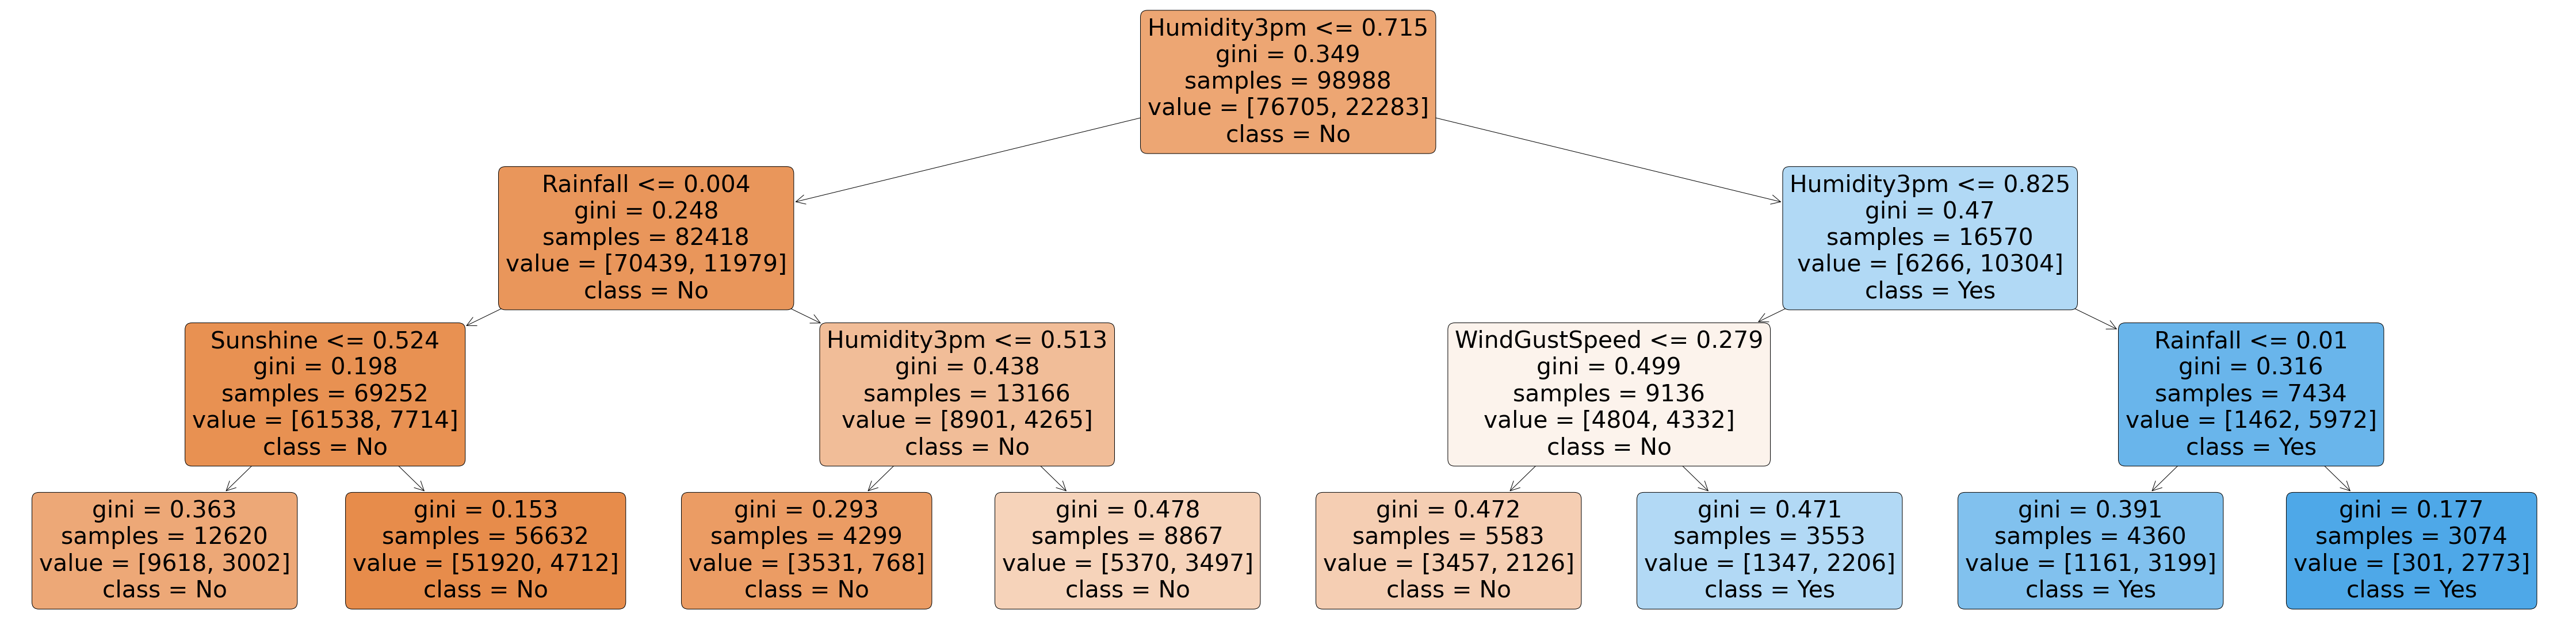

In [ ]:
plt.figure(figsize  = (80,20))
plot_tree(model, feature_names= x_train.columns, filled = True, rounded = True, class_names = model.classes_)

In [ ]:
print(export_text(model,feature_names = list(x_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [ ]:
def max_depth_error(md):
  model = DecisionTreeClassifier(max_depth = md, random_state = 42)
  model.fit(x_train,train_label)
  train_error = 1 - model.score(x_train, train_label)
  validation_error = 1-model.score(x_validation, validation_label)
  return {"Maximum Depth" : md, "Training Error":train_error, "Validation Error": validation_error}

In [ ]:
value = max_depth_error(5)

In [ ]:
type(value)

dict

In [ ]:
%%time 
errors_df =pd.DataFrame([max_depth_error(i) for i in range(1,21)])

CPU times: user 39.5 s, sys: 100 ms, total: 39.6 s
Wall time: 43.3 s


In [ ]:
errors_df

,Maximum Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156211,0.157275
6,7,0.153231,0.154721
7,8,0.147644,0.157739
8,9,0.140785,0.156520
9,10,0.132794,0.157971


Text(0, 0.5, 'Prediction Error')

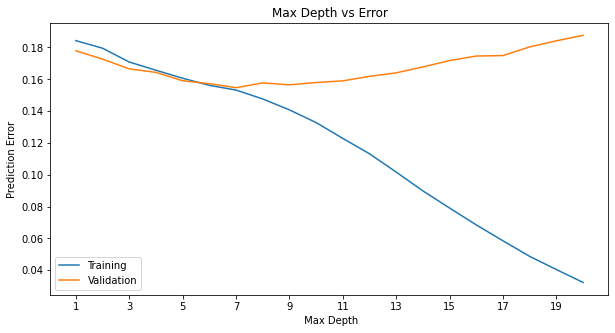

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(errors_df["Maximum Depth"], errors_df['Training Error'])
plt.plot(errors_df["Maximum Depth"], errors_df['Validation Error'])
plt.legend(['Training','Validation'])
plt.title("Max Depth vs Error")
plt.xticks(range(1,21,2))
plt.xlabel(" Max Depth")
plt.ylabel("Prediction Error")

In [ ]:
model = DecisionTreeClassifier(max_depth = 6 , random_state =42)
model.fit(x_train,train_label)
model.score(x_train, train_label), model.score(x_validation, validation_label)

(0.8437891461591304, 0.8427253206430271)

### `max_leaf_nodes`

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths. 

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes = 128, random_state= 42)

In [ ]:
model.fit(x_train, train_label)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [ ]:
model.score(x_train, train_label)

0.8480421869317493

In [ ]:
model.score(x_validation,validation_label)

0.8442342290058615

In [ ]:
model.tree_.max_depth

12

## Random Forests and Regularization

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs= -1 , random_state= 42)

In [ ]:
%%time
model.fit(x_train,train_label)

CPU times: user 31.6 s, sys: 159 ms, total: 31.7 s
Wall time: 27.4 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(x_train, train_label)

0.9999494888269285

In [ ]:
model.score(x_validation, validation_label)

0.8544483779235099

In [ ]:
model_proba =model.predict_proba(x_train)
model_proba

array([[0.92, 0.08],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.94, 0.06]])

In [ ]:
len(model.estimators_)

100

In [ ]:
model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

[Text(0.5, 0.875, 'Sunshine <= 0.403\ngini = 0.347\nsamples = 62607\nvalue = [76887, 22101]'),
 Text(0.25, 0.625, 'Pressure9am <= 0.609\ngini = 0.499\nsamples = 11288\nvalue = [9272, 8542]'),
 Text(0.125, 0.375, 'Cloud9am <= 0.833\ngini = 0.475\nsamples = 6067\nvalue = [3702, 5808]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindDir3pm_NNE <= 0.5\ngini = 0.442\nsamples = 5221\nvalue = [5570, 2734]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'RainToday_Yes <= 0.5\ngini = 0.278\nsamples = 51319\nvalue = [67615, 13559]'),
 Text(0.625, 0.375, 'Pressure9am <= 0.521\ngini = 0.207\nsamples = 41960\nvalue = [58514, 7796]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Location_NorahHead <= 0.5\ngini = 0.475\nsamples = 9359\nvalue = [9101, 5763]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

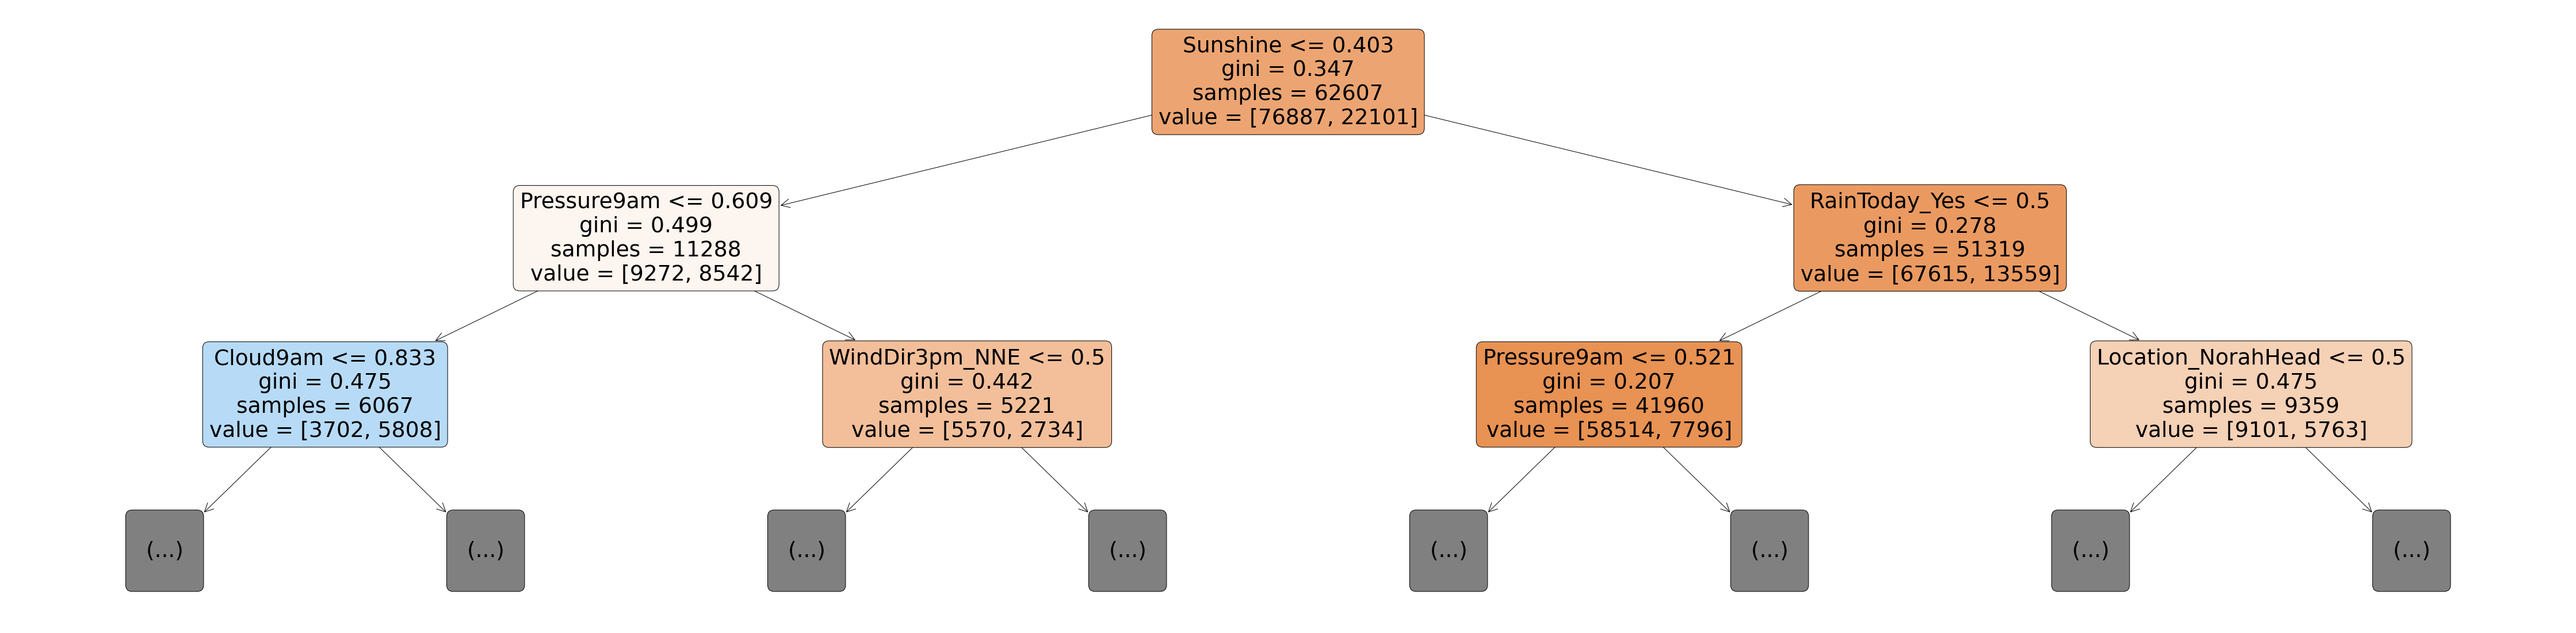

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names= x_train.columns,filled = True, rounded = True)

[Text(0.5, 0.875, 'Rainfall <= 0.002\ngini = 0.35\nsamples = 62618\nvalue = [76569, 22419]'),
 Text(0.25, 0.625, 'Cloud9am <= 0.611\ngini = 0.249\nsamples = 46387\nvalue = [62551, 10679]'),
 Text(0.125, 0.375, 'Cloud3pm <= 0.467\ngini = 0.203\nsamples = 35331\nvalue = [49392, 6401]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Temp9am <= 0.699\ngini = 0.37\nsamples = 11056\nvalue = [13159, 4278]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Temp3pm <= 0.373\ngini = 0.496\nsamples = 16231\nvalue = [14018, 11740]'),
 Text(0.625, 0.375, 'Humidity9am <= 0.845\ngini = 0.493\nsamples = 3900\nvalue = [2720, 3457]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Cloud9am <= 0.389\ngini = 0.488\nsamples = 12331\nvalue = [11298, 8283]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

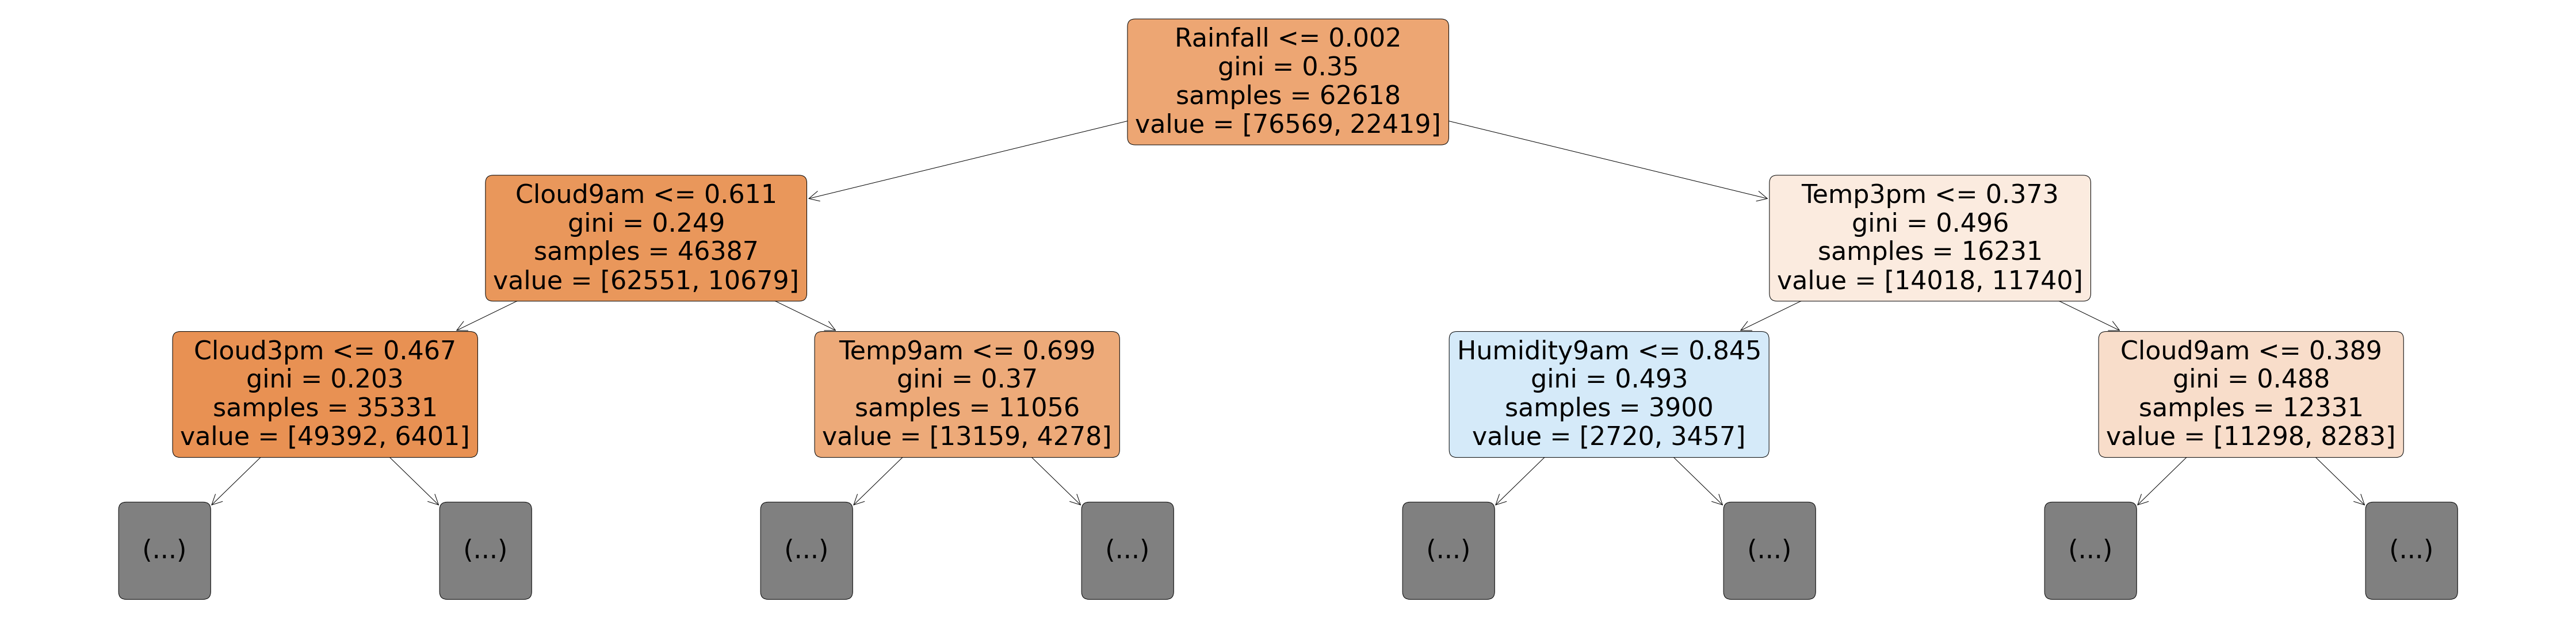

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[70], max_depth=2, feature_names= x_train.columns,filled = True, rounded = True)

In [ ]:
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    "Importance" : model.feature_importances_
}).sort_values("Importance", ascending = False)

In [ ]:
importance_df.head(10)

,Feature,Importance
9,Humidity3pm,0.135595
11,Pressure3pm,0.054211
4,Sunshine,0.054104
8,Humidity9am,0.051212
10,Pressure9am,0.048214
5,WindGustSpeed,0.047578
2,Rainfall,0.045809
15,Temp3pm,0.045585
1,MaxTemp,0.042351
0,MinTemp,0.042210


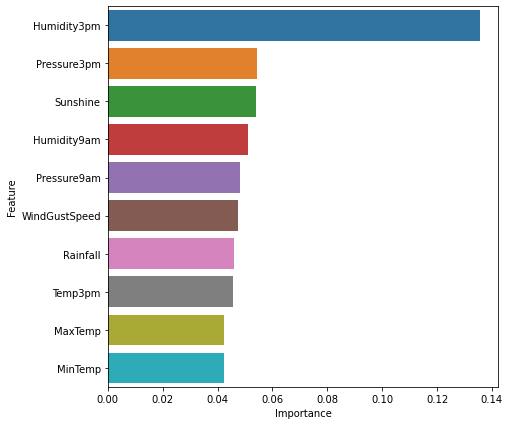

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(data = importance_df.head(10), x='Importance',y='Feature')

## Hyperparameter Tuning with Random Forest

In [ ]:
base_model = RandomForestClassifier(n_jobs= -1, random_state=42).fit(x_train, train_label)

In [ ]:
base_train_acc = base_model.score(x_train,train_label)
base_val_acc = base_model.score(x_validation, validation_label)

In [ ]:
base_accuracy = base_train_acc, base_val_acc
type(base_accuracy)

tuple

In [ ]:
base_accuracy

(0.9999494888269285, 0.8544483779235099)

In [ ]:
model = RandomForestClassifier(n_estimators= 10, n_jobs= -1, random_state =42)

In [ ]:
model.fit(x_train, train_label)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
model.score(x_train, train_label),model.score(x_validation, validation_label)

(0.987059037459086, 0.8441181591317973)

In [ ]:
base_accuracy

(0.9999494888269285, 0.8544483779235099)

In [ ]:
model = RandomForestClassifier(n_estimators= 50, n_jobs= -1, random_state =42).fit(x_train, train_label)

In [ ]:
model.score(x_train, train_label),model.score(x_validation, validation_label)

(0.9999797955307714, 0.8565956705936975)

In [ ]:
def test_params(**params):
  model = RandomForestClassifier(n_jobs= -1, random_state =42, **params).fit(x_train, train_label)
  return model.score(x_train, train_label), model.score(x_validation, validation_label)

In [ ]:
test_params(max_depth =5)

(0.8208065624116054, 0.8250826997852707)

In [ ]:
test_params(max_depth = 26)

(0.9813512749020084, 0.8567117404677616)

In [ ]:
test_params(max_leaf_nodes = 2**5)

(0.8301511294298298, 0.8316406476698973)

In [ ]:
base_accuracy

(0.9999494888269285, 0.8544483779235099)

### `max_features`

Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split.

<img src="https://i.imgur.com/FXGWMDY.png" width="720">

Notice that the default value `auto` causes only $\sqrt{n}$ out of total features ( $n$ ) to be chosen randomly at each split. This is the reason each decision tree in the forest is different. While it may seem counterintuitive, choosing all features for every split of every tree will lead to identical trees, so the random forest will not generalize well. 

In [ ]:
test_params(max_features = 'log2')

(0.9999494888269285, 0.8545644477975741)

In [ ]:
test_params(max_features= 3)

(0.9999393865923142, 0.8531716093088039)

In [ ]:
test_params(max_features= 6)

(0.9999494888269285, 0.8545644477975741)

In [ ]:
base_accuracy ## Having alomost 11 features i.e. sqrt(119) 119 is no. of features that we have in dataset 

(0.9999494888269285, 0.8544483779235099)

In [ ]:
test_params(max_features= 20)

(0.9999595910615429, 0.8566537055307295)

### `min_samples_split` and `min_samples_leaf`

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [ ]:
test_params(min_samples_split = 3, min_samples_leaf =2)

(0.9623489715925163, 0.8552608670419592)

In [ ]:
test_params(min_samples_split = 100 , min_samples_leaf = 60)

(0.8492140461470077, 0.8449306482502467)

### `min_impurity_decrease`

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.


In [ ]:
test_params(min_impurity_decrease = 1e-7)

(0.9996060128500425, 0.8573501247751146)

In [ ]:
test_params(min_impurity_decrease = 1e-6)

(0.9887562128742878, 0.8570599500899542)

### `bootstrap`, `max_samples` 

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.


<img src="https://i.imgur.com/W8UGaEA.png" width="640">

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

In [ ]:
test_params(bootstrap = False)

(0.9999797955307714, 0.8579885090824676)

When bootstrapping is enabled, you can also control the number or fraction of rows to be considered for each bootstrap using `max_samples`. This can further generalize the model.

<img src="https://i.imgur.com/rsdrL1W.png" width="640">

In [ ]:
test_params(max_samples = 0.9)

(0.9997676486038711, 0.8560153212233764)

Learn more about bootstrapping here: https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710

### `class_weight`

In [ ]:
train_label.value_counts()/len(train_label)

No     0.774892
Yes    0.225108
Name: RainTomorrow, dtype: float64

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.8539260634902212)

In [ ]:
test_params(class_weight= {'Yes':3, "No":1})

(0.9999595910615429, 0.8549126574197667)

## Putting it all Together 

In [ ]:
model = RandomForestClassifier(n_jobs = -1,
                               random_state =42,
                               n_estimators = 500,
                               max_features = 7,
                               max_depth = 30,
                               class_weight= {"Yes":1.5,"No":1})

In [ ]:
model.fit(x_train, train_label)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [ ]:
model.score(x_train, train_label), model.score(x_validation, validation_label)

(0.9917767810239625, 0.8566537055307295)

In [ ]:
base_accuracy

(0.9999494888269285, 0.8544483779235099)

In [ ]:
model.score(x_test, test_label)

0.8445753445753446